# **Les aventuriers des Axes Perdus** 
# Epoch 1.9

***Olivier Thöni*** *(novice en IA, et sinon... professeur de mathématiques)*

*School of AI - Le Mans*

Lien vers le présent NoteBook : https://frama.link/OT_dimensions1_9   





# **1. Diminuer la dimensionnalité**

## **1.1.la régression linéaire**

https://frama.link/OT_dimensions 


## **1.2. L' "Analyse en Composantes Principales" (ACP)**

### **1.2.0/ l'ACP *from scratch* sur données simulées**

source : https://www.lpsm.paris/pageperso/rebafka/NB7_ACP.html 


L'ACP, à quoi sert-ce ?

Divers points de vue (au sens propre...)


In [0]:
#%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

On simule deux jeux de données de même taille. Le premier tableau de données est composé de 20 réalisations i.i.d. de la loi normale  N(0,0.3) , le deuxième contient 20 réalisations i.i.d. de la loi normale  N(0.5,.2) .

In [0]:
np.random.seed(234)  
jeu1 = pd.DataFrame(np.sqrt(.3)*np.random.randn(20,3),columns=list('ABC')) 
print('jeu1 :'), jeu1.shape, '\n', jeu1.head(), '\n' 
jeu2 = pd.DataFrame(np.sqrt(.2)*np.random.randn(20,3)+.5,columns=list('ABC')) 
print('jeu2 :'), jeu2.shape, '\n', jeu2.head()

jeu1 :
jeu2 :


(None, (20, 3), '\n',           A         B         C
 0  0.216355  1.095396  0.156774
 1  0.903916  1.373958 -0.132441
 2  0.329976  0.570340  0.736356
 3  0.781577 -0.122020  0.762135
 4  1.142091  0.946711  0.794450)

In [0]:
print (jeu1.describe())
print (jeu2.describe())

               A          B          C
count  20.000000  20.000000  20.000000
mean    0.204432   0.063061  -0.081521
std     0.476635   0.523045   0.587254
min    -0.703031  -0.626166  -1.713761
25%    -0.098464  -0.355382  -0.171024
50%     0.394073   0.017060   0.008826
75%     0.499345   0.534064   0.197912
max     0.919071   1.181992   1.127869
               A          B          C
count  20.000000  20.000000  20.000000
mean    0.576878   0.612413   0.508070
std     0.442297   0.466569   0.575018
min    -0.223874  -0.175731  -0.570708
25%     0.261960   0.352292  -0.031961
50%     0.572278   0.619588   0.677623
75%     0.926991   0.916843   0.836673
max     1.418941   1.608790   1.320450


Voici quelques représentations graphiques des données. D'abord variable par variable :

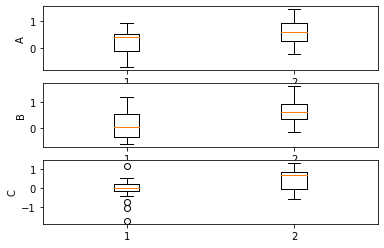

In [0]:
#plt.figure(figsize=(8,8))

plt.subplot(311)
plt.boxplot([jeu1['A'],jeu2['A']])
plt.ylabel('A')

plt.subplot(312)
plt.boxplot([jeu1['B'],jeu2['B']])
plt.ylabel('B')

plt.subplot(313)
plt.boxplot([jeu1['C'],jeu2['C']])
plt.ylabel('C')

plt.show()

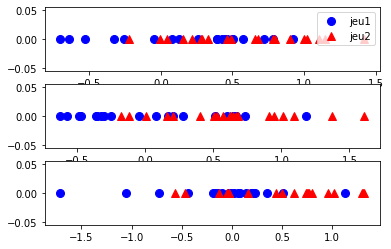

In [0]:
#plt.figure(figsize=(8,8))

plt.subplot(311)
plt.plot(jeu1['A'], np.zeros(20), 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['A'], np.zeros(20), '^', markersize=8, color='red', label='jeu2')
plt.legend(loc=0)

plt.subplot(312)
plt.plot(jeu1['B'], np.zeros(20), 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['B'], np.zeros(20), '^', markersize=8, color='red', label='jeu2')

plt.subplot(313)
plt.plot(jeu1['C'], np.zeros(20), 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['C'], np.zeros(20), '^', markersize=8, color='red', label='jeu2')

plt.show()

Pour les trois variables on observe beaucoup de chevauchements des deux groupes. Autrement dit, on ne peut pas utiliser une des variables pour séparer les deux jeux de données.

Voyons avec les nuages des points en dimension 2 :

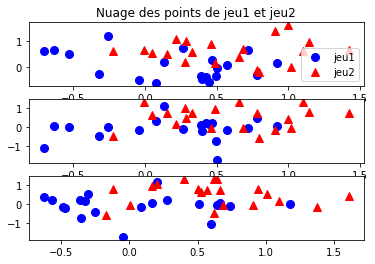

In [0]:
#plt.figure(figsize=(8,8))

plt.subplot(311)
plt.plot(jeu1['A'], jeu1['B'], 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['A'], jeu2['B'], '^', markersize=8, color='red', label='jeu2')
plt.title('Nuage des points de jeu1 et jeu2')
plt.legend(loc=0)

plt.subplot(312)
plt.plot(jeu1['A'], jeu1['C'], 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['A'], jeu2['C'], '^', markersize=8, color='red', label='jeu2')

plt.subplot(313)
plt.plot(jeu1['B'], jeu1['C'], 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['B'], jeu2['C'], '^', markersize=8, color='red', label='jeu2')

plt.show()

Les deux jeux de données sont légèrement mieux séparés qu'en dimension 1, mais la séparation est loin d'être optimale.

Enfin, traçons le nuage des points en 3D :

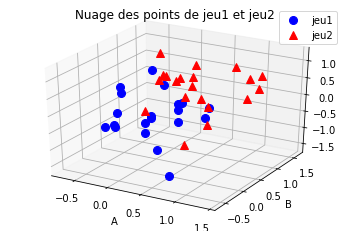

In [0]:
fig = plt.figure()
fig.add_subplot(111, projection='3d')
plt.plot(jeu1['A'], jeu1['B'], jeu1['C'], 'o', markersize=8, color='blue',  label='jeu1')
plt.plot(jeu2['A'], jeu2['B'], jeu2['C'], '^', markersize=8, color='red', label='jeu2')
plt.title('Nuage des points de jeu1 et jeu2')
plt.legend(loc=0)
plt.xlabel('A')
plt.ylabel('B')

plt.show()

Noter que la figure ci-dessus est interactive : vous pouvez la faire tourner en cliquant et bougeant la souris. Essayez-le !

On dirait que les points rouges se trouvent plutôt en haut à droite, alors que les points bleus se trouvent en bas à gauche. Il semble qu'on pourrait introduire un plan qui sépare assez bien les deux jeux de données. Mais comment trouver ce plan ? C'est par l'analyse en composantes principales (ACP) !

En fait, l'ACP est une technique de réduction de dimension des données. Plus précisément, on cherche un sous-espace vectoriel de petite dimension qui explique au mieux les données, c'est-à-dire qui préserve un maximum de la variance des données quand on les projette dans cet sous-espace vectoriel.

L'ACP repose sur une SVD des données complètes. On crée alors un seul tableau de données :

In [0]:
df = pd.concat([jeu1,jeu2],ignore_index=True)
print ('df :', df.shape, '\n', df.head())

df : (40, 3) 
           A         B         C
0  0.448471 -0.571576  0.192196
1  0.504769 -0.047861 -1.713761
2 -0.531144  0.511938  0.024027
3  0.780623 -0.305116  0.507643
4 -0.703031  0.600445 -1.058459


In [0]:
df.describe()

,A,B,C
count,40.000000,40.000000,40.000000
mean,0.390655,0.337737,0.213275
std,0.491479,0.562774,0.646706
min,-0.703031,-0.626166,-1.713761
25%,0.116848,-0.135448,-0.105172
50%,0.436283,0.453357,0.148563
75%,0.733606,0.664721,0.740718
max,1.418941,1.608790,1.320450


Rappelons que la SVD d'une matrice  X  de taille  n×p  consiste à calculer les valeurs singulières  λ=(λ1,…,λp)  (triées par ordre décroissant) et les matrices unitaires  U=[u1,…,un]  et  V=[v1,…,vp] , tels que

![…](https://drive.google.com/uc?id=19vJD_YxKptzkD6B0qm-AKav039TDvPDL)
 
Les colonnes  vk  de  V  sont les axes principaux et les vecteurs  λkuk  sont les composantes principales.

En Python, c'est la fonction np.linalg.svd qui effectue la SVD d'une matrice. Elle renvoie les valeurs singulières  λ  et les matrices unitaires  U  et  V .

Pour l'ACP, nous effectuons la SVD du tableau des données centré.

In [0]:
moy = df.mean()
df_centre = df
df_centre['A'] =df_centre['A'] - moy[0]
df_centre['B'] =df_centre['B'] - moy[1]
df_centre['C'] =df_centre['C'] - moy[2]

U, lamb ,V  = np.linalg.svd(df_centre)
print ('U : dimensions :', U.shape, '\n' , U, '\n lambda :\n', lamb, '\n V :dimensions :', V.shape, '\n', V, '\n')

U : dimensions : (40, 40) 
 [[-0.08016633  0.24954351  0.02017695 ... -0.05241184  0.05128136
   0.03639094]
 [-0.41447148 -0.06072098 -0.28138753 ...  0.07287957  0.19822456
   0.10318354]
 [-0.0906032  -0.13580931  0.260539   ... -0.23240311 -0.29179327
  -0.15403108]
 ...
 [ 0.14304098  0.10155904  0.15281051 ...  0.94529937 -0.06059889
  -0.03173766]
 [ 0.2183952  -0.01492947  0.26114769 ... -0.06450452  0.90758327
  -0.04911905]
 [ 0.10973732 -0.01300494  0.14325562 ... -0.03291673 -0.04838817
   0.97419441]] 
 lambda :
 [4.30736035 3.3720568  2.85642057] 
 V :dimensions : (3, 3) 
 [[ 0.31667818  0.37972899  0.86920701]
 [ 0.2611152  -0.91586366  0.3049797 ]
 [-0.91188474 -0.13038275  0.38918704]] 



Afin d'illustrer les axes principaux, on les ajoute au graphique du nuage des points. Por cela, nous définissons d'abord une classe pour tracer des flêches :

In [0]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


Voici le nuage des points avec les directions des axes principaux :

[0, 0] 0.37972898752084305 0.8692070118596289
[1, 0] -0.91586365516569 0.30497969941701086
[2, 0] -0.13038274879345751 0.38918704176470853


Text(0.5, 0, 'B')

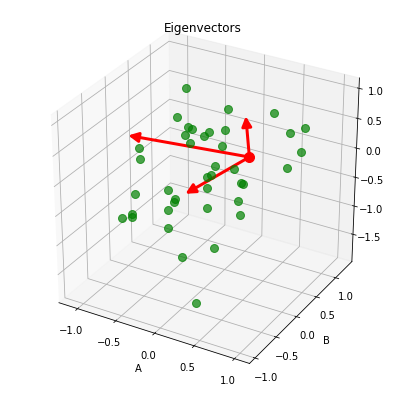

In [0]:
fig2 = plt.figure(figsize=(7,7))
ax = fig2.add_subplot(111, projection='3d')
plt.plot(df['A'],df['B'],df['C'], 'o', markersize=8, color='green',alpha=0.7)
plt.plot([moy[0]], [moy[1]], [moy[2]], 'o', markersize=10, color='red')
for i in range(V.shape[0]):
    print ([i,0], V[i,1],  V[i,2])
    a = Arrow3D([moy[0], V[i,0]], [moy[1], V[i,1]], [moy[2], V[i,2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
plt.title('Eigenvectors')
plt.xlabel('A')
plt.ylabel('B')

Calculons les composantes principales :

In [0]:
df_proj = pd.DataFrame(U[:,[0,1,2]], columns=['CP1','CP2','CP3'] )
df_proj['CP1'] = lamb[0]*df_proj['CP1']
df_proj['CP2'] = lamb[1]*df_proj['CP2']
df_proj['CP3'] = lamb[2]*df_proj['CP3']
df_proj.head()

,CP1,CP2,CP3
0,-0.345305,0.841475,0.057634
1,-1.785278,-0.204755,-0.803761
2,-0.390261,-0.457957,0.744209
3,0.135251,0.780368,-0.157225
4,-1.351989,-0.914035,0.468121


Représentons la première composante principale et comparez aux graphiques obtenus plus haut :

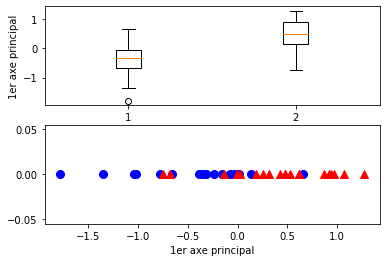

In [0]:
#plt.figure()
plt.subplot(211)
plt.boxplot([df_proj.loc[0:19,'CP1'],df_proj.loc[20:39,'CP1']])
plt.ylabel('1er axe principal')

plt.subplot(212)
plt.plot(df_proj.loc[0:19,'CP1'],np.zeros(20), 'o', markersize=8, color='blue', label='jeu2')
plt.plot(df_proj.loc[20:39,'CP1'],np.zeros(20), '^', markersize=8, color='red', label='jeu2')
plt.xlabel('1er axe principal')

plt.show()

Ensuite, représentons les données en dimension 2, c'est-à-dire par le nuage des points défini par les deux premières composantes prinicpales :

Text(0.5, 1.0, 'ACP avec 2 composantes principales')

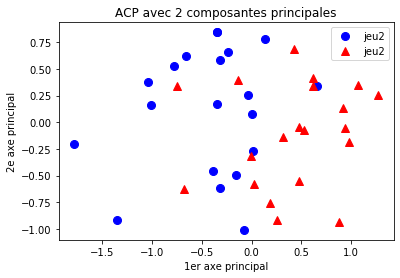

In [0]:
#plt.figure()
plt.plot(df_proj.loc[0:19,'CP1'],df_proj.loc[0:19,'CP2'], 'o', markersize=8, color='blue', label='jeu2')
plt.plot(df_proj.loc[20:39,'CP1'],df_proj.loc[20:39,'CP2'], '^', markersize=8, color='red', label='jeu2')
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')


Comparé aux nuages de points des variables d'origines, les deux jeu de données sont beaucoup mieux séparés. Ceci est dû au fait que l'ACP cherche à préserver un maximum de la variance des données.

Calculons la variance ou l'inertie totale dans les données définie par

![…](https://drive.google.com/uc?id=1De-QlOa5C-56nv2mBY1bB9yF23ROvzbI)
 
où les vecteurs  Xi  sont supposés centrés.

In [0]:
n = df_centre.shape[0]
inertie_tot = ((df_centre**2).sum()).sum()/n
print ('inertie totale : ', inertie_tot)

inertie totale :  0.9520814667020862


Dans le cours, on a montré qu'on peut calculer l'inertie également par la formule suivante qui fait intervenir les valeurs singulières :

![…](https://drive.google.com/uc?id=1mm1Fgifk2KRKl_LqcEIHi4a8KQzXQ7g8)
 
Vérifions que cette formule donne le même résultat :

In [0]:
sum(lamb**2)/n

0.952081466702087

L'inertie du nuage projeté sur le premier axe principal est donné par

![…](https://drive.google.com/uc?id=1KOH-WxLyk2VGdREgDtPHyw7MrFxi1O3G)
 
et la proportion de l'inertie (ou de la variance) expliquée par la première composante prinicpale est donnée par

![…](https://drive.google.com/uc?id=1EaJDn9AKWKC4Ud6vJBJubwLpxGzCkCAe)
 
Ici on trouve pour  I1  :

In [0]:
lamb[0]**2/n

0.4638338289523919

et pour la proportion de la variance expliquée on a :

In [0]:
lamb[0]**2/sum(lamb**2)

0.4871787186017441

ça veut dire que pour nos données la première composante principale explique presque la moitié de la variance de nos données d'origine. Pour comparaison, la part de variabilité expliquée par chacune des variables d'origine est entre 0.25 et 0.42 :

In [0]:
df.var()*(n-1)/sum(lamb**2)

A    0.247366
B    0.324338
C    0.428296
dtype: float64

Inertie du nuage projeté sur le plan engendré par les deux premiers axes principaux est donnée par

![…](https://drive.google.com/uc?id=1P64js1ZWWWXbGYLC3aVSc7lc0tGu-9tU)
 
et la proportion de la variance (ou inertie) expliquée par les deux premières composantes prinicpales est donnée par

![…](https://drive.google.com/uc?id=1WMpHMIWeGsIVgWtxyePbqTCH7vXwCxAH)
 
Ici on trouve pour  I2  

In [0]:
sum(lamb[0:2]**2)/n

0.7481030054730503

Et pour la part de la variance expliquée par les deux premières composantes principales :

In [0]:
sum(lamb[0:2]**2)/sum(lamb**2)

0.7857552443116057

Le module sklearn contient une fonction pour faire l'ACP qui est plus commode à utiliser :

In [0]:
from sklearn.decomposition import PCA  

In [0]:
sklearn_pca = PCA() 
df_transf = sklearn_pca.fit_transform(df)  # pas nécessaire de centrer les colonnes ; renvoie les comp. princ.
df_transf

array([[ 3.45305277e-01, -8.41474884e-01,  5.76338533e-02],
       [ 1.78527803e+00,  2.04754598e-01, -8.03761127e-01],
       [ 3.90260652e-01,  4.57956709e-01,  7.44208966e-01],
       [-1.35251013e-01, -7.80368183e-01, -1.57224703e-01],
       [ 1.35198866e+00,  9.14035467e-01,  4.68120908e-01],
       [ 1.58123088e-01,  4.93031204e-01, -5.53732237e-02],
       [ 7.79662074e-01, -5.25884660e-01,  3.57905320e-01],
       [ 1.04420679e+00, -3.74937007e-01, -3.72479624e-01],
       [ 3.19475478e-02, -2.50459291e-01, -5.18852961e-01],
       [ 3.45311645e-01, -1.74335913e-01, -2.68721175e-01],
       [-1.70569210e-03, -7.52858419e-02, -5.82177865e-02],
       [ 3.45913370e-01, -8.42914004e-01,  4.64442037e-01],
       [ 1.01629811e+00, -1.57253031e-01,  4.75694505e-01],
       [-1.03268398e-02,  2.68019172e-01, -4.32064607e-01],
       [ 3.14677504e-01, -5.87058902e-01,  5.53877464e-02],
       [ 2.39181819e-01, -6.53838162e-01,  6.74896004e-02],
       [ 7.57342821e-02,  1.00957411e+00

Text(0.5, 1.0, 'ACP avec 2 composantes principales')

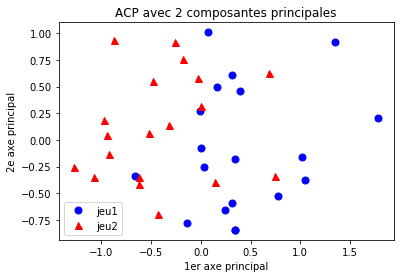

In [0]:
#plt.figure()
plt.plot(df_transf[0:19,0],df_transf[0:19,1], 'o', markersize=7, color='blue', label='jeu1')
plt.plot(df_transf[20:39,0], df_transf[20:39,1], '^', markersize=7, color='red', label='jeu2')
plt.xlabel('1er axe principal')
plt.ylabel('2e axe principal')
plt.legend()
plt.title('ACP avec 2 composantes principales')

On accède facilement à la variance (ou inertie) expliquée par chacune des composantes principales, et ces valeurs premettent de retrouver les valeurs singulières. On vérifie qu'on retrouve exactement les mêmes valeurs qu'avec l'autre méthode :

In [0]:
inerties = sklearn_pca.explained_variance_   # inertie expliquée par chaque composante principale
print ("Inertie d'une, deux, trois composantes principales :\n", np.cumsum(inerties))
print ('valeurs singulieres :', np.sqrt(inerties*n))

Inertie d'une, deux, trois composantes principales :
 [0.475727   0.76728513 0.97649381]
valeurs singulieres : [4.36223339 3.41501467 2.89280956]


Exercice - Données Iris
Un des jeux de données les plus célèbres en statistique est le jeu de données Iris. Ces données quantifient les variations de morphologie des fleurs d'Iris de trois espèces, et elles étaient présentées pour la première fois en 1936 par le statisticien Ronald Fisher.

Un peu de culture générale : Ronald Fisher (1890-1962) est un biologiste et statisticien britannique. Il est considéré par Richard Dawkins comme le plus grand des successeurs de Darwin et par Anders Hald comme l'homme qui a - presque à lui seul - fondé les statistiques modernes. Bradley Efron le considère comme le statisticien le plus important du XXe siècle. Dans le domaine des statistiques, il a introduit de nombreux concepts clés tels que le maximum de vraisemblance et l'information de Fisher.

Le jeu de données Iris comprend 50 échantillons de chacune des trois espèces de Iris (Iris setosa, Iris virginica et Iris versicolor). Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et les pétales, en centimètres.

Le jeu de données est disponible à l'adresse http://www.proba.jussieu.fr/pageperso/rebafka/irisdata.csv

Importez les données.
Familiarisez-vous avec les données. Vérifiez qu'il y a bien le même nombre d'observations pour chaque espèce.
Tracer des nuages des points (utilisez des couleurs différentes pour les différentes espèces) et des boxplots pour comparer les différentes espèces.
Effectuez une ACP et représentez graphiquement les résultats.
Calculez l'inertie totale et l'inertie des données projetées.